In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
data = pd.read_csv('train.csv')

In [7]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
data= np.array(data)
m,n= data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev= data_dev[0]
X_dev= data_dev[1:n]
X_dev= X_dev/255

data_train = data[1000:m].T
Y_train= data_train[0]
X_train= data_train[1:n]
X_train= X_train/255
_,m_train= X_train.shape

In [9]:
Y_train

array([6, 0, 5, ..., 8, 5, 6])

In [10]:
#forward propagation
def init_params():
  w1 = np.random.rand(10,784)-0.5
  b1 = np.random.rand(10,1)-0.5
  w2 = np.random.rand(10,10)-0.5
  b2 = np.random.rand(10,1)-0.5
  return w1,b1,w2,b2

def ReLU(Z):
  return np.maximum(Z,0)


def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A


def forward_prop(w1,b1,w2,b2,X):
  Z1 = w1.dot(X)+b1
  A1 = ReLU(Z1)
  Z2= w2.dot(A1)+b2
  A2= softmax(Z2)
  return Z1,A1,Z2,A2



In [11]:
#back propagation

def one_hot(Y):
  one_hot_Y = np.zeros((Y.size,Y.max()+1))
  one_hot_Y[np.arange(Y.size),Y]=1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y


def deriv_ReLU(Z):
  return Z>0

def back_prop(Z1,A1,Z2,A2,w1,w2,X,Y):
  one_hot_Y = one_hot(Y)
  dZ2 = A2-one_hot_Y
  dW2= 1 / m * dZ2.dot(A1.T)
  db2 = 1 / m * np.sum(dZ2)
  dZ1 = w2.T.dot(dZ2) * deriv_ReLU(Z1)
  dW1 = 1 / m * dZ1.dot(X.T)
  db1 = 1 / m * np.sum(dZ1)
  return dW1,db1,dW2,db2


def update_params(w1,b1,w2,b2,dW1,db1,dW2,db2,alpha):
  w1=w1-alpha*dW1
  b1=b1-alpha*db1
  w2=w2-alpha*dW2
  b2=b2-alpha*db2
  return w1,b1,w2,b2


In [12]:
def get_prediction(A2):
  return np.argmax(A2,0)

def get_accuracy(predictions,Y):
  print(predictions,Y)
  return np.sum(predictions==Y)/Y.size

def gradient_descent(X, Y, alpha, iterations):
    w1, b1, w2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(w1, b1, w2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, w1, w2, X, Y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_prediction(A2)
            print(get_accuracy(predictions, Y))
    return w1, b1, w2, b2

In [13]:
w1,b1,w2,b2= gradient_descent(X_train,Y_train,0.10,500)

Iteration:  0
[1 3 4 ... 1 3 1] [6 0 5 ... 8 5 6]
0.11670731707317074
Iteration:  10
[3 3 4 ... 8 3 5] [6 0 5 ... 8 5 6]
0.17212195121951218
Iteration:  20
[3 3 4 ... 8 3 1] [6 0 5 ... 8 5 6]
0.23382926829268294
Iteration:  30
[3 3 4 ... 8 3 1] [6 0 5 ... 8 5 6]
0.28119512195121954
Iteration:  40
[2 3 4 ... 8 3 1] [6 0 5 ... 8 5 6]
0.3324390243902439
Iteration:  50
[2 3 4 ... 8 3 1] [6 0 5 ... 8 5 6]
0.36446341463414633
Iteration:  60
[2 2 9 ... 8 3 1] [6 0 5 ... 8 5 6]
0.39434146341463416
Iteration:  70
[2 2 0 ... 8 3 1] [6 0 5 ... 8 5 6]
0.4328292682926829
Iteration:  80
[2 2 0 ... 8 3 1] [6 0 5 ... 8 5 6]
0.4824390243902439
Iteration:  90
[6 2 0 ... 8 3 1] [6 0 5 ... 8 5 6]
0.5229756097560976
Iteration:  100
[6 2 0 ... 8 3 1] [6 0 5 ... 8 5 6]
0.5585121951219513
Iteration:  110
[6 2 0 ... 8 5 1] [6 0 5 ... 8 5 6]
0.589390243902439
Iteration:  120
[6 2 0 ... 8 5 5] [6 0 5 ... 8 5 6]
0.6180243902439024
Iteration:  130
[6 2 0 ... 8 5 5] [6 0 5 ... 8 5 6]
0.6441463414634147
Iteration:  

In [14]:
def make_predictions(X,w1,b1,w2,b2):
  _,_,_,A2= forward_prop(w1,b1,w2,b2,X)
  predictions = get_prediction(A2)
  return predictions


def test_prediction(index,w1,b1,w2,b2):
  current_image = X_train[:,index,None]
  prediction = make_predictions(X_train[:,index,None],w1,b1,w2,b2)
  label = Y_train[index]
  print("prediction",prediction)
  print("Label : ",label)

  current_image = current_image.reshape((28,28))*255
  plt.gray()
  plt.imshow(current_image,interpolation='nearest')
  plt.show()

prediction [8]
Label :  8


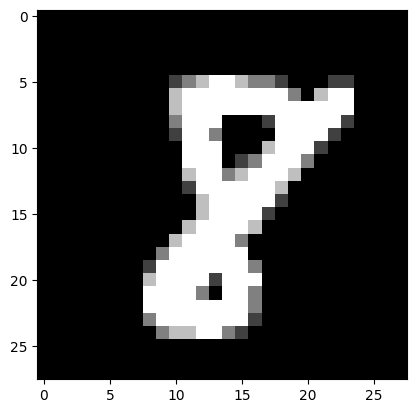

In [24]:
test_prediction(90,w1,b1,w2,b2)